In [1]:
import os
from pathlib import Path

# Print the current working directory
starting_path = os.getcwd()

# Change directory to sleap-roots
if os.path.basename(os.getcwd()) == "sleap-roots":
    pass
else:
    os.chdir("..")
    
current_path = os.getcwd()

print(f"Starting directory: {starting_path}")
print(f"Current directory: {current_path}")

Starting directory: c:\repos\sleap-roots\notebooks
Current directory: c:\repos\sleap-roots


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns

# Import the sleap_roots package
import sleap_roots as sr

# Use the following notation to import individual functions from the sleap_roots package
from sleap_roots.points import get_all_pts_array
from sleap_roots.convhull import get_convhull, get_chull_area, get_chull_perimeter
from sleap_roots.lengths import get_root_lengths, get_curve_index
from sleap_roots.bases import get_bases, get_base_tip_dist
from sleap_roots.tips import get_tips
from sleap_roots.trait_pipelines import LateralRootPipeline

In [3]:
# Print sleap_roots version
print(sr.__version__)

0.1.4


---

The `LateralRootPipeline` was constructed for any plant type that has lateral roots.
This pipeline calculates the traits related to the lateral roots.

The pipeline runs on the `Series` object, which should contain sleap predictions.

### Example: Dicot (`canola_7do`)

In [4]:
# Folder containing the data for a plant. It should include slp primary predictions.
canola_folder_path = "tests/data/canola_7do"

# List of slp files in the folder.
all_slps = sr.find_all_slp_paths(canola_folder_path)

print(all_slps)

['tests/data/canola_7do/919QDUH.lateral.predictions.slp', 'tests/data/canola_7do/919QDUH.primary.predictions.slp']


Series name: 919QDUH
Number of frames: 72


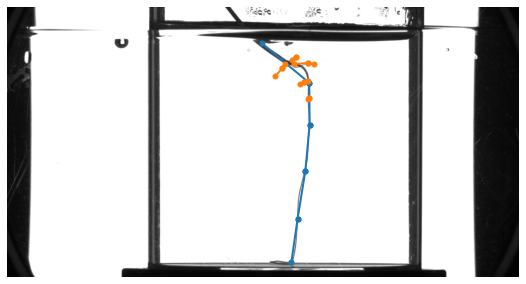

In [5]:
# Load canola predictions as a Series, using slp files.
# Since h5 files are in the folder, set the h5s parameter to True.
canola = sr.load_series_from_slps(all_slps, h5s=True)[0]

# Print the name of the series.
print(f"Series name: {canola.series_name}")

# Find the number of frames.
print(f"Number of frames: {len(canola)}")

# Plot the first frame. Note that h5 files are required to be in the folder for plotting. 
canola.plot(0, scale=0.25)

In [6]:
# Instantiate the PrimaryRootPipeline.
pipeline = LateralRootPipeline()

# Compute plant traits per frame.
canola_computed_traits = pipeline.compute_plant_traits(canola)
canola_computed_traits.head()

# This dataframe can be saved as a csv by changing the write_csv to True.
# Uncomment the lines below to save it in the current working directory.
# print(f"Current directory: {os.getcwd()}")
# pipeline.compute_plant_traits(canola, write_csv=True)

,plant_name,frame_idx,lateral_count,lateral_lengths_min,lateral_lengths_max,lateral_lengths_mean,lateral_lengths_median,lateral_lengths_std,lateral_lengths_p5,lateral_lengths_p25,...,lateral_tip_xs_p95,lateral_tip_ys_min,lateral_tip_ys_max,lateral_tip_ys_mean,lateral_tip_ys_median,lateral_tip_ys_std,lateral_tip_ys_p5,lateral_tip_ys_p25,lateral_tip_ys_p75,lateral_tip_ys_p95
0,919QDUH,0,5,3.897240,80.268003,40.400556,34.925591,27.798341,7.143708,20.129579,...,1224.554541,228.926666,368.516937,295.546608,292.371414,50.710066,236.064580,264.616234,323.301788,359.473907
1,919QDUH,1,3,36.702972,62.276362,48.358489,46.096133,10.562142,37.642288,41.399552,...,1215.594385,231.875549,305.086517,271.130727,276.430115,30.122241,236.331006,254.152832,290.758316,302.220877
2,919QDUH,2,4,39.545626,82.769101,66.389865,71.622367,17.419740,42.973641,56.685703,...,1217.197589,228.999893,312.726562,281.546917,292.230606,33.383952,236.121558,264.608219,309.169304,312.015111
3,919QDUH,3,5,8.385096,60.350160,35.908835,38.573964,21.649158,9.501436,13.966794,...,1209.867120,228.568710,305.067963,278.464672,290.111008,31.044321,235.715154,264.300930,304.274750,304.909320
4,919QDUH,4,4,5.869169,63.578500,41.599796,48.475757,22.982031,10.555177,29.299210,...,1205.077551,228.699860,304.847565,278.573822,290.373932,30.999152,235.862836,264.514740,304.433014,304.764655


For a single plant, the traits can be aggregated and summarized over all frames using `compute_batch_traits`.

For each scalar csv trait over all frames, 9 summary statistics are calculated (min, max, median, mean, standard deviation, percentile 5, percentile 25, percentile 75, percentile 95).

In [7]:
canola_computed_batch_traits = pipeline.compute_batch_traits([canola])
canola_computed_batch_traits

# This dataframe can be saved as a csv by changing the write_csv to True.
# Uncomment the lines below to save it in the current working directory.
# print(f"Current directory: {os.getcwd()}")
# pipeline.compute_batch_traits([canola], write_csv=True)

Processing series: 919QDUH


,plant_name,lateral_count_min,lateral_count_max,lateral_count_mean,lateral_count_median,lateral_count_std,lateral_count_p5,lateral_count_p25,lateral_count_p75,lateral_count_p95,...,lateral_tip_ys_p75_p95,lateral_tip_ys_p95_min,lateral_tip_ys_p95_max,lateral_tip_ys_p95_mean,lateral_tip_ys_p95_median,lateral_tip_ys_p95_std,lateral_tip_ys_p95_p5,lateral_tip_ys_p95_p25,lateral_tip_ys_p95_p75,lateral_tip_ys_p95_p95
0,919QDUH,3,6,4.125,4.0,0.762625,3.0,4.0,4.0,6.0,...,309.722499,299.290117,544.745947,319.24154,307.040385,46.069134,300.90065,304.854035,311.272205,404.539204
